In [2]:
from pathlib import Path
import os

import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2 as cv

In [9]:
path = Path("./data/test/40/0.png")
img = cv.imread(str(path))
img = img / 255
img = torch.tensor(img)

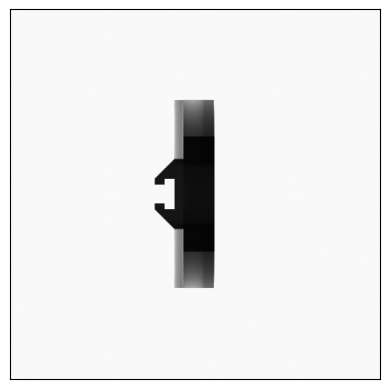

In [10]:
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [51]:
n_buckets = 10
boundaries = torch.arange(0, 1.00001, 1.0 /n_buckets)
bucketized = torch.bucketize(img, boundaries=boundaries)
_, inverses, counts = torch.unique(bucketized, return_counts=True, return_inverse=True)
f = counts[inverses].to(img.dtype)

(tensor(10), tensor(1))

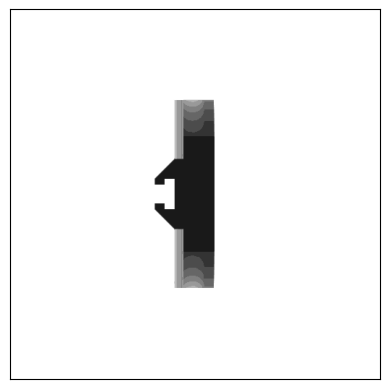

In [52]:
# fig = plt.imshow(f / f.max())
fig = plt.imshow(boundaries[bucketized])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
bucketized.max(), bucketized.min()

Text(0, 0.5, 'log10(count)')

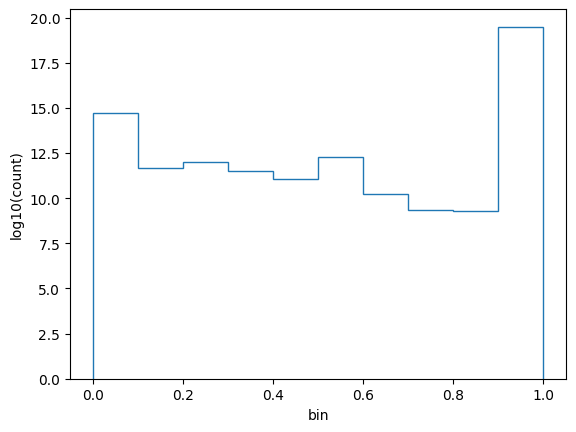

In [65]:
fig = plt.stairs(torch.log2(counts), boundaries)
plt.xlabel("bin")
plt.ylabel("log10(count)")